# **Unidad 2: Ejercicios de repaso (regresión y clasificación)**
1. Carga y limpieza del dataset
2. Separación de Datos
3. Preprocesamiento de datos
4. Machine learning
5. Sistematización del Flujo

---
## **Problemas de Clasificación**

### 1. Carga y limpieza del dataset




#### Carga del dataset

#### Solución Carga del dataset:



In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
 df = sns.load_dataset("penguins")       # carga CSV integrado en seaborn

In [ ]:
df.read_csv('./penguins.csv')

#### Limpieza de datos:
- Revisar valores nulos (NaN) y decidir si imputar o eliminar.
- Revisar outliers extremos y decidir si transformarlos, eliminarlos o dejarlos según el contexto.
- Eliminar duplicados si no aportan información relevante.

In [ ]:
# investigar libreria amissingno

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [ ]:
df.isnull().sum()

,0
Date,0
Id,0
suburb,0
postalCode,0
sellPrice,0
bed,154
bath,0
car,18151
propType,0


In [ ]:
df.shape

(199504, 9)

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
help(SimpleImputer())

Help on SimpleImputer in module sklearn.impute._base object:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |
 |  Univariate imputer for completing missing values with simple strategies.
 |
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |
 |  Read more in the :ref:`User Guide <impute>`.
 |
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be set to ei

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='car', ylabel='Density'>

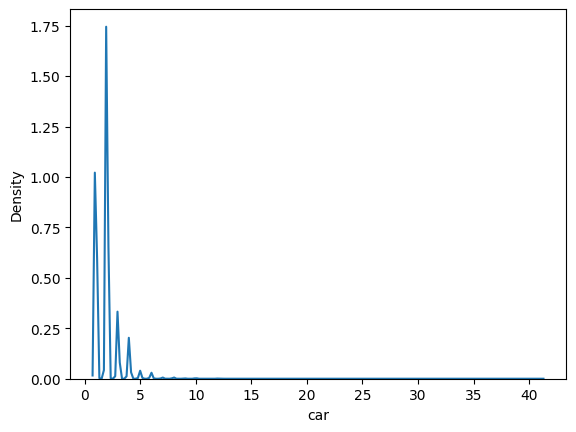

In [ ]:
sns.kdeplot(df['car'])

In [ ]:
# df
simple_i_car = SimpleImputer(strategy='mean')

In [ ]:
type(df['car'])

pandas.core.series.Series

In [ ]:
type(df[['car']])

pandas.core.frame.DataFrame

In [ ]:
simple_i_car.fit(df[['car']])

SimpleImputer()

In [ ]:
df_procesado = df.copy()

In [ ]:
simple_i_car.transform(df_procesado[['car']])

array([[2.],
       [4.],
       [2.],
       ...,
       [2.],
       [2.],
       [3.]])

In [ ]:
df_procesado['car'] = simple_i_car.transform(df_procesado[['car']])

In [ ]:
df_procesado.isna().sum()

,0
Date,0
Id,0
suburb,0
postalCode,0
sellPrice,0
bed,154
bath,0
car,0
propType,0


#### Solución Limpieza de datos::



In [ ]:
# Revisar valores nulos
df.isnull().sum()

In [ ]:
# Imputar valores faltantes (ejemplo: media para numéricas, moda para categóricas)
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

### 2. Separación de Datos
- Separar variables predictoras (`X`) y target (`y`).
- Dividir en conjunto de entrenamiento y testeo:
  - `X_train`, `X_test`
  - `y_train`, `y_test`.

#### Solución Separación de Datos:



In [ ]:
X = df.drop(columns='species').copy()
y = df['species'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### 3. Preprocesamiento

- Encoding de variables categóricas. (usar solo X_train para ajustar el encoder).
- Escalado de variables (usar solo X_train para ajustar el scaler).


In [ ]:
# binarizar target para mayor compativilidad


#### Encoding de variables categóricas

-	Escoger entre:
  - One-Hot Encoding: para categorías sin orden.
  - Ordinal Encoding: si las categorías tienen un orden natural.

- Solo ajustar el encoder usando X_train para evitar data leakage.
- Aplicar el encoder ajustado a X_test sin recalibrar.



#### Solución Encoding de variables categóricas:



In [ ]:
# Separar variables categóricas nomianles
cat_cols_nom = #

# Separar variables categóricas ordinales
cat_cols_ord = #

In [ ]:
# Crear y ajustar el encoder solo con X_train
encoder_nom = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder_nom.fit_transform(X_train[cat_cols_nom])

# Aplicar a X_test
X_test_encoded = encoder_nom.transform(X_test[cat_cols])

In [ ]:
# Crear y ajustar el encoder solo con X_train
encoder_ord = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder_ord.fit_transform(X_train[cat_cols_nom])

# Aplicar a X_test
X_test_encoded = encoder_ord.transform(X_test[cat_cols])

#### Escalado de variables

- Escoger el tipo de escalado según distribución empirica de los datos:
  - `StandardScaler` → normalización a media 0, desviación 1 (útil si la distribución se parece a una distribución teorica normal).
  - `MinMaxScaler` → rango [0,1] (útil en distribuciones que se alejan bastante a una distribución teorica normal).
- Ajustar el scaler solo en `X_trai` y aplicar a `X_test` para evitar data leakage.

#### Solución escalado de variables:



In [ ]:
# Seleccionar columnas numéricas
num_cols = X_train.select_dtypes(include='number').columns

In [ ]:
# Crear y ajustar el scaler solo con X_train
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Aplicar a X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

### 4. Machine learning

#### 4.1. Modelos bases out of the box (sin optimización)

- KNNClassifier
- DecisionTreeClassifier.



#### Solución Modelos bases out of the box (sin optimización):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar el modelo base
knn = KNeighborsClassifier()  # parámetros por defecto: n_neighbors=5

# Entrenar el modelo con X_train e y_train
knn.fit(X_train, y_train)

# Predecir sobre X_test
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar el modelo base
dt = DecisionTreeClassifier(random_state=42)  # random_state para reproducibilidad

# Entrenar el modelo
dt.fit(X_train, y_train)

# Predecir sobre X_test
y_pred_dt = dt.predict(X_test)



#### 4.2. Modelos de Ensemble out of the box (sin optimización)
- Bagging (ej: [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)).
- Boosting (ej: [XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)).

#### Solución Modelos de ensemble out of the box (sin optimización):

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar el modelo base
rf = RandomForestClassifier(random_state=42)  # random_state para reproducibilidad

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir sobre X_test
y_pred_rf = rf.predict(X_test)

In [ ]:
from xgboost import XGBClassifier

# Instanciar el modelo base
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Predecir sobre X_test
y_pred_xgb = xgb.predict(X_test)

#### 4.3. Optimización de Hiperparámetros sobre modelos base (GridSearchCV y RandomizedSearchCV)
- Optimizar un Árbol de Decisión al máximo
- Optimizar un KNN al máximo

#### Solución Optimización de Hiperparámetros sobre modelos base (GridSearchCV y RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# --- KNN ---
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=L1, 2=L2
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1-macro', n_jobs=-1)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)

In [ ]:
# --- Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1-macro', n_jobs=-1)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)

#### 4.4. Exploración Manual
-	Usar bucle for para variar hiperparámetros y visualizar impacto en rendimiento sobre modelos bases:
  - KNN
  - Árbol de Decisión

#### Solución Exploración Manual

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
# Rango de n_neighbors
n_neighbors_range = [1, 3, 5, 7, 9, 11]
f1_scores_knn = []

for k in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores_knn.append(f1_score(y_test, y_pred, average='macro'))

# Visualización
plt.plot(n_neighbors_range, f1_scores_knn, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('F1 Macro')
plt.title('Exploración manual KNN (n_neighbors)')
plt.show()

In [ ]:
# Rango de max_depth
max_depth_range = [None, 3, 5, 7, 10]
f1_scores_dt = []

for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred, average='macro'))

# Visualización
plt.plot([str(d) for d in max_depth_range], f1_scores_dt, marker='o')
plt.xlabel('max_depth')
plt.ylabel('F1 Macro')
plt.title('Exploración manual Decision Tree (max_depth)')
plt.show()

#### 4.5. Métricas Avanzadas para cada modelo
- Tiempos de entrenamiento.
- Reporte de clasificación (classification_report).
- Curva ROC (gráfico TPR vs FPR para todos los umbrales).
- AUC (área bajo la curva ROC).


#### Solución metricas avanzadas para cada modelo

In [ ]:
import time
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, accuracy_score

In [ ]:
# Lista de modelos y nombres
models = [
    ('KNN Base', knn),
    ('KNN Optimizado', grid_knn.best_estimator_),
    ('Decision Tree Base', dt),
    ('Decision Tree Optimizado', grid_dt.best_estimator_),
    ('Random Forest', rf),
    ('XGBoost', xgb)
]

# Guardar métricas para comparativa final
results = []

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

for i, (name, model) in enumerate(models):
    # Entrenamiento y tiempo
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # Probabilidades para ROC/AUC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Guardar resultados
    results.append({
        'Modelo': name,
        'Tiempo': train_time,
        'Accuracy': acc,
        'F1': f1,
        'AUC': roc_auc
    })

    # Mostrar reporte y ROC
    print(f"\n{name} - Tiempo de entrenamiento: {train_time:.4f} s")
    print(classification_report(y_test, y_pred))
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'{name} (AUC={roc_auc:.2f})')

# Curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de todos los modelos')
plt.legend()
plt.show()

#### 4.6. Comparaciones Finales
- Gráfico comparativo entre todos los modelos:
  - Tiempos de entrenamiento.
  - Métricas de interés (accuracy, AUC, F1, etc.).

#### Solución comparativas finales

In [ ]:
import seaborn as sns

In [ ]:
df_results = pd.DataFrame(results)

In [ ]:
# Gráfico de tiempos de entrenamiento
plt.figure(figsize=(8,5))
sns.barplot(x='Modelo', y='Tiempo', data=df_results, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tiempo de Entrenamiento por Modelo')
plt.show()

In [ ]:
# Gráfico de métricas (Accuracy, F1, AUC)
plt.figure(figsize=(10,5))
df_plot = df_results.melt(id_vars='Modelo', value_vars=['Accuracy','F1','AUC'], var_name='Métrica', value_name='Valor')
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_plot, palette='Set1')
plt.xticks(rotation=45)
plt.title('Comparativa de Métricas por Modelo')
plt.show()

### 5. Sistematización del Flujo

- Construir un Pipeline que encadene:
  - Transformaciones de datos.
  - Modelo final.
  - Verificar que evita fugas de datos (data leakage).

#### Solución sistematización del flujo

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Columnas
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns

In [ ]:
# Transformaciones
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [ ]:
# Pipeline con modelo final
pipeline_final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) # o otro
])

In [ ]:
# Entrenamiento
pipeline_final_model.fit(X_train, y_train)

In [ ]:
# Predicción
y_pred = pipeline_final_model.predict(X_test)

---
## **Problemas de Regresión**

### 1. Carga y limpieza del dataset




#### Carga del dataset

#### Limpieza de datos:
- Revisar valores nulos (NaN) y decidir si imputar o eliminar.
- Revisar outliers extremos y decidir si transformarlos, eliminarlos o dejarlos según el contexto.
- Eliminar duplicados si no aportan información relevante.

### 2. Separación de Datos
- Separar variables predictoras (`X`) y target (`y`).
- Dividir en conjunto de entrenamiento y testeo:
  - `X_train`, `X_test`
  - `y_train`, `y_test`.

### 3. Preprocesamiento
- Cargar dataset.
- Limpieza de datos.
- Encoding de variables categóricas. (usar solo X_train para ajustar el encoder).
- Escalado de variables (usar solo X_train para ajustar el scaler).

### 4. Machine learning

#### 4.1. Modelos bases out of the box (sin optimización)

- [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)





#### 4.2. Modelos de Ensemble out of the box (sin optimización)
- Bagging (ej: [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)).
- Boosting (ej: [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor)).

#### 4.3. Optimización de Hiperparámetros sobre modelos base (GridSearchCV o RandomizedSearchCV)

- Optimizar un Árbol de Decisión al máximo
- Optimizar un KNN al máximo

#### 4.4. Exploración Manual

-	Usar bucle for para variar hiperparámetros y visualizar impacto en rendimiento:
  - KNN
  - Árbol de Decisión

#### 4.5. Métricas Avanzadas
- Tiempos de entrenamiento.
- R^2, RMSE y MAE.


#### 4.6. Comparaciones Finales
- Gráfico comparativo entre todos los modelos:
  - Tiempos de entrenamiento.
  - Métricas de interés (R^2, RMSE, MAE, etc.).

### 5. Sistematización del Flujo

- Construir un Pipeline que encadene:
  - Transformaciones de datos.
  - Modelo final.
  - Verificar que evita fugas de datos (data leakage).

---
# Unidad 2: Ejercicios resueltos